### Copyright 2026 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Selecting k-th element in an array using quickselect and visualize the single steps

In [1]:
# main function to be called for selecting the k-th element in the complete array
def select(a, k):
    global steps, index_last_complete_step
    steps=[]
    index_last_complete_step=0

    # the pivot element is stored in an additional element at the end of the array (a[ARRAY_SIZE])
    # rationale: improve understandability of pivot comparisons and assignments in output
    a.append(-1)

    # nothing yet done
    steps.append([[UNSORTED]*ARRAY_SIZE, [], [], a[:]])

    # run quickselect
    element = quickselect(a, 0, ARRAY_SIZE-1, k)
    
    # remove space for pivot element at end of a 
    a.pop()
    
    return element

In [2]:
def quickselect(a, left, right, k):
    global steps, index_last_complete_step
    pos_pivot = partition(a, left, right)

    if k == pos_pivot: 
        new_state = steps[index_last_complete_step][0][:pos_pivot] + [FOUND] + steps[index_last_complete_step][0][pos_pivot+1:]
        step = [new_state, [], [], a[:]]
        index_last_complete_step = len(steps)
        steps.append(step)
        return a[k]

    else:
        new_state = steps[index_last_complete_step][0][:left] +\
                    [PART_SORTED]*((pos_pivot-1)-left+1) + [SORTED] + [PART_SORTED]*(right-(pos_pivot+1)+1) +\
                    steps[index_last_complete_step][0][right+1:]
        step = [new_state, [], [], a[:]]
        index_last_complete_step = len(steps)
        steps.append(step)
    
        if k < pos_pivot:
            return quickselect(a, left, pos_pivot-1, k)
        else:
            return quickselect(a, pos_pivot+1, right, k)

In [3]:
def partition(a, left, right):
    global steps
    # pivot element is the key at right side of part to be sorted
    a[ARRAY_SIZE] = a[right]
    i = left-1
    for j in range(left, right):
        steps.append([[], [j,ARRAY_SIZE], [], a[:]])
        if a[j] <= a[ARRAY_SIZE]:
            i = i+1
            a[i], a[j] = a[j], a[i]
            steps.append([[], [], [i,j], a[:]])
    a[i+1], a[right] = a[right], a[i+1]
    steps.append([[], [], [i+1,right], a[:]])
    # return position of pivot element
    return i+1

## Constants

In [4]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_EXCHANGE = 'sandybrown'
COL_FOUND = 'aqua'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# some output text
TEXT_BEFORE_SELECTING = "Before selecting:"
TEXT_AFTER_SELECTING = "After  selecting:"
TEXT_FOUND = "Found element:"
TEXT_SEARCH = "Search for k-smallest element with k ="

# number of ticks on axes
NUM_X_TICKS = 10
NUM_Y_TICKS = 10

# graphical output: width of bars and size of fonts - two settings are given here
# use for good readability of fewer sorting steps, e.g. 20-30
#BAR_WIDTH = 20
#FONTSIZE_LEGEND = 20
#FONTSIZE_ELEMENTS = 24
#FONTSIZE_AXES = 24
#FONTSIZE_AXES_LEGEND = 20
# use for good readability of more sorting steps, e.g. 80-100
BAR_WIDTH = 8
FONTSIZE_LEGEND = 14
FONTSIZE_ELEMENTS = 14
FONTSIZE_AXES = 14
FONTSIZE_AXES_LEGEND = 14

## Helper functions for output graphical view

In [5]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=FONTSIZE_ELEMENTS)

def plot_states(x, states, a):
    # colors
    for y in range(ARRAY_SIZE):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    # values
    plot_values(x, range(ARRAY_SIZE), a)

def plot_elements(x, y_vals, col, a):
    # colors
    minimum = min(y_vals)
    maximum = max(y_vals)
    # elements
    plot_interval(x, [minimum, minimum], col)
    plot_interval(x, [maximum, maximum], col)
    # line between both elements
    if maximum-minimum > 1:
        plot_interval(x, [minimum+1, maximum-1], col, thick_lines = False)
    # values
    plot_values(x, [minimum,maximum], a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=BAR_WIDTH, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//NUM_X_TICKS)), fontsize=BAR_WIDTH)
    plt.yticks(range(0, ARRAY_SIZE+1, max(1,ARRAY_SIZE//NUM_Y_TICKS)), fontsize=BAR_WIDTH)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE+1])
    #plt.axis('off')
    plt.xlabel("Selecting steps", fontsize=FONTSIZE_AXES_LEGEND)
    plt.ylabel("Indexes of array for selection", fontsize=FONTSIZE_AXES_LEGEND)

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[0]) > 0:
            plot_states(i, step[0], step[3])
        elif output_compared_keys and len(step[1]) > 0:
            plot_elements(i, step[1], COL_COMPARISON, step[3])
        elif output_exchanged_keys and len(step[2]) > 0:
            plot_elements(i, step[2], COL_EXCHANGE, step[3])

    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=ARRAY_SIZE-OFFSET, color=COL_LAST_HORIZ_LINE)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between algorithm and output functions

In [7]:
# steps contains the data for visualization of the single steps
# steps: [[states], [compared keys], [exchanged keys], [array]]
# [states] state for each position is one of [sorted, partially sorted, unsorted]
# [compared keys]: two indexes in a list
# [exchanged keys]: one or two indexes in a list
# [array]: copy of array in current state
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
UNSORTED = 2
PART_SORTED = 1
SORTED = 0
FOUND = 5
# used as base for the next step showing the states
index_last_complete_step = 0

## Configuration data for keys in output 

In [8]:
# change output settings here
output_compared_keys = False
output_compared_keys = True
output_exchanged_keys = False
output_exchanged_keys = True
output_duplicate_states = False
#output_duplicate_states = True

## Size of predefined tests

In [9]:
# The size of array in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

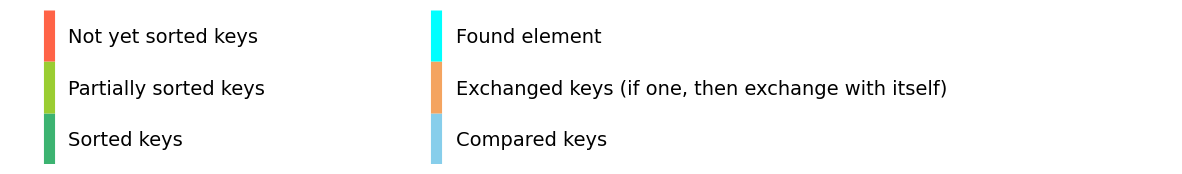

In [10]:
COLORS = [[COL_SORTED,"Sorted keys"], [COL_PART_SORTED,"Partially sorted keys"], [COL_UNSORTED,"Not yet sorted keys"],
          [COL_COMPARISON,"Compared keys"], [COL_EXCHANGE,"Exchanged keys (if one, then exchange with itself)"], [COL_FOUND,"Found element"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
for i in range(3):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
plt.show()

## Generate test data and test algorithm

Before selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Found element: 9
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


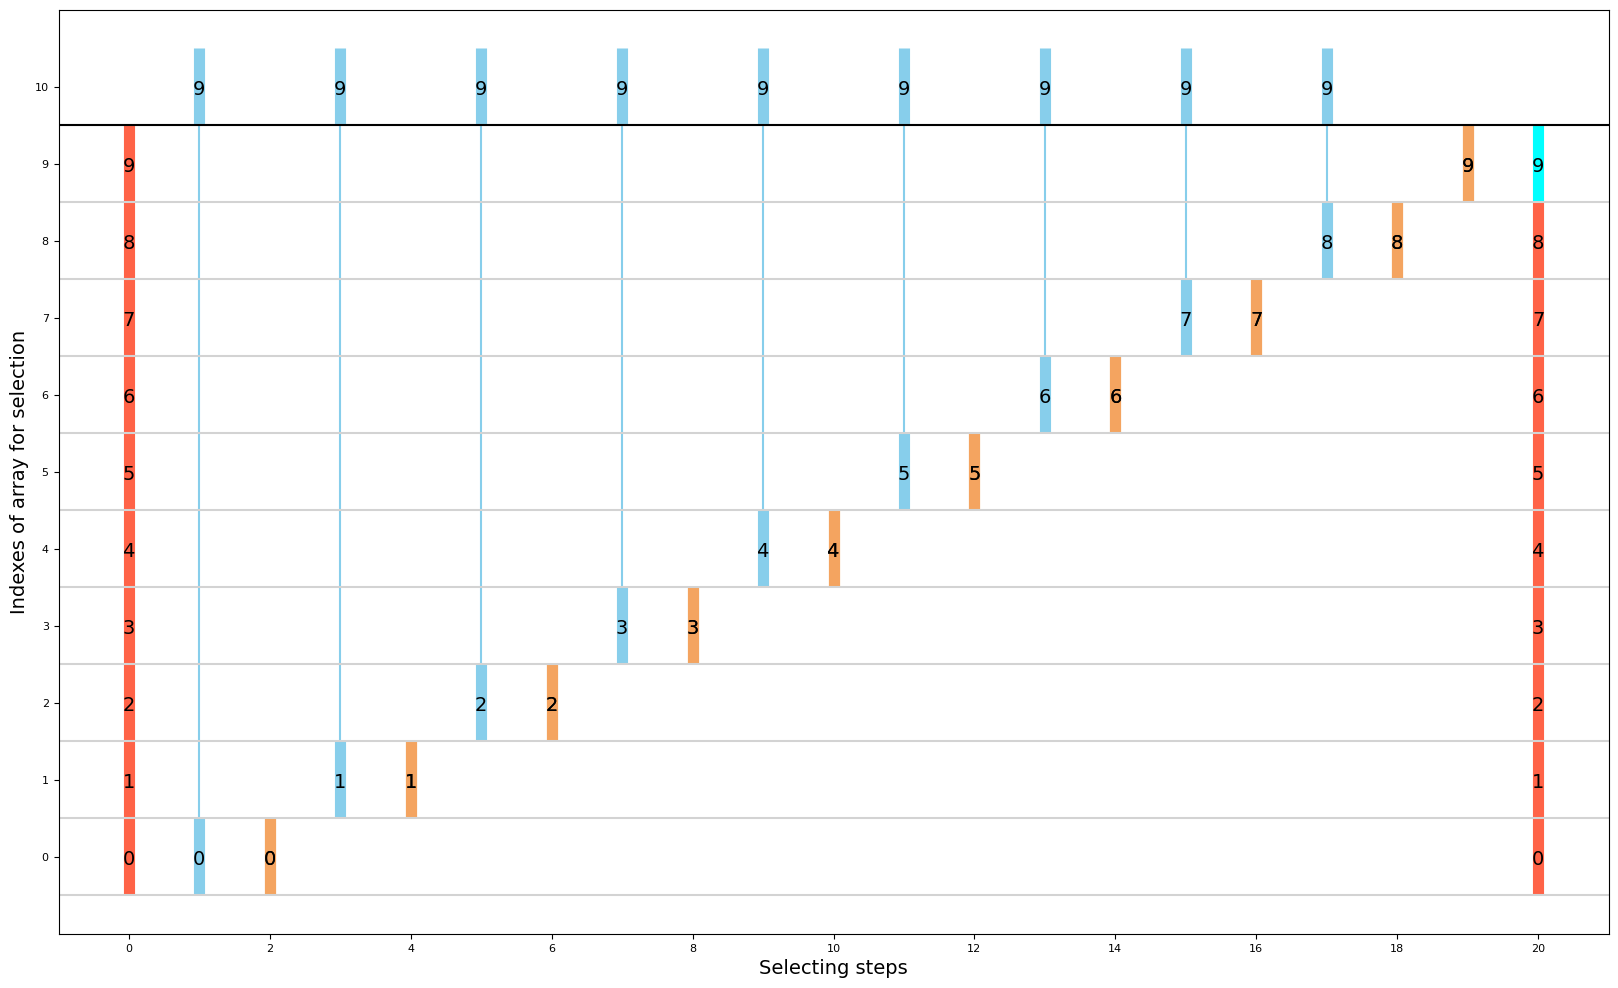

In [11]:
# test selecting largest element from sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, sorted_array)
print(TEXT_FOUND, select(sorted_array, 9))
print(TEXT_AFTER_SELECTING, sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Found element: 5
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


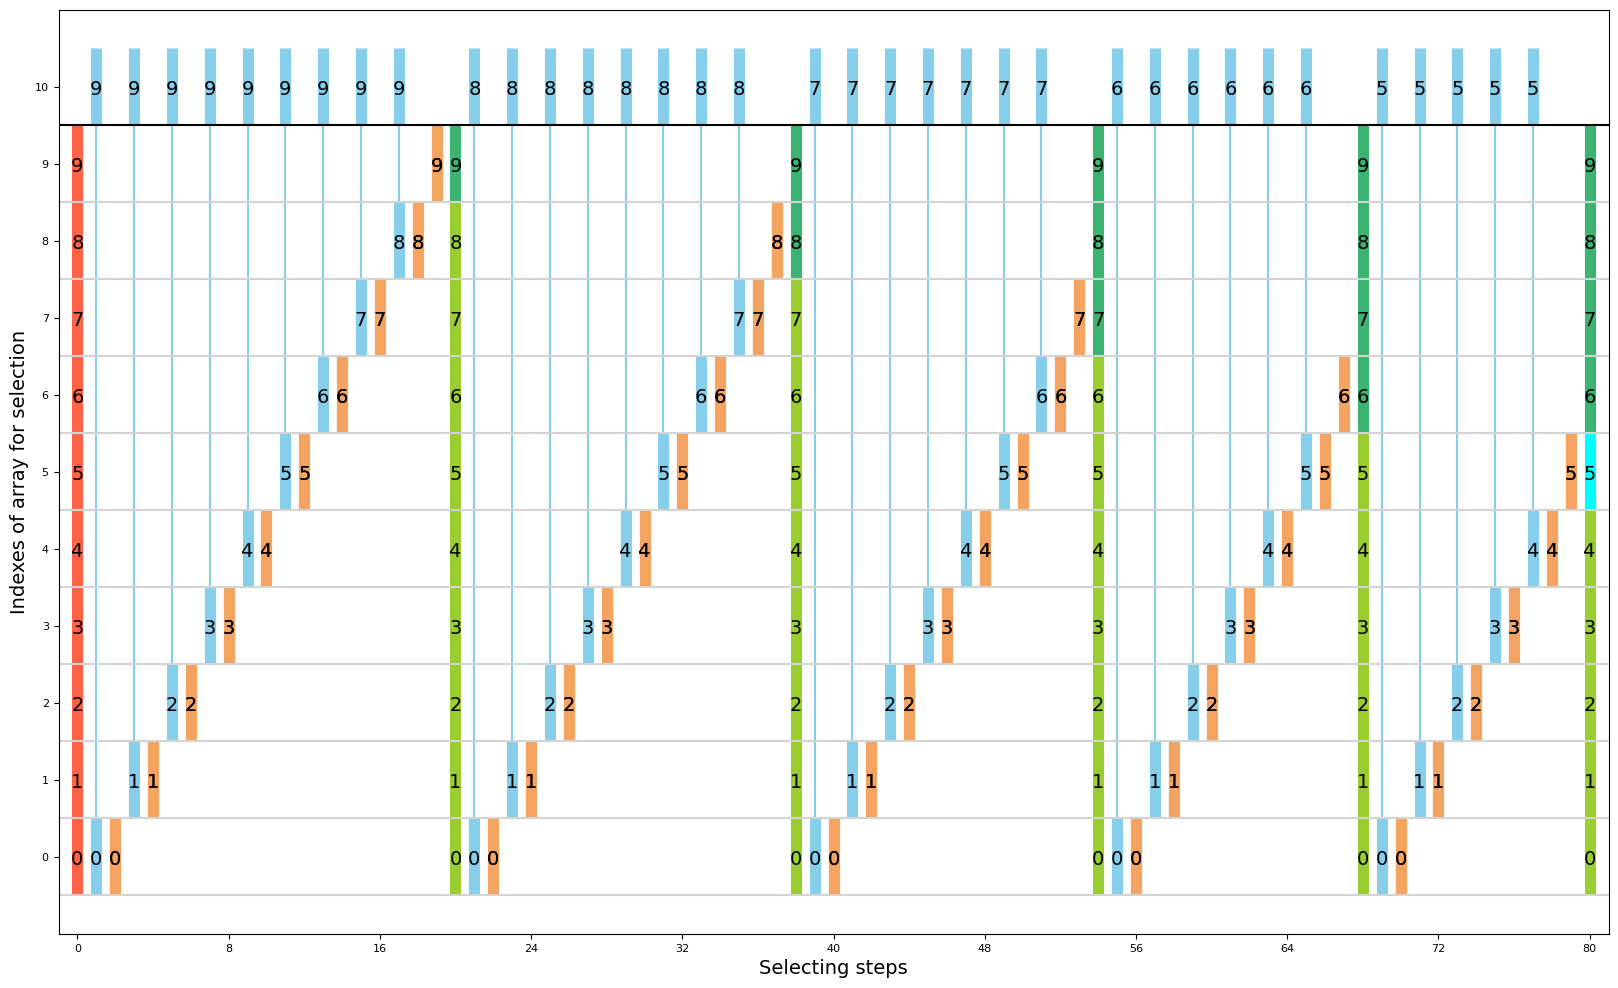

In [12]:
# test selecting element in the middle from sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, sorted_array)
print(TEXT_FOUND, select(sorted_array, 5))
print(TEXT_AFTER_SELECTING, sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Found element: 0
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


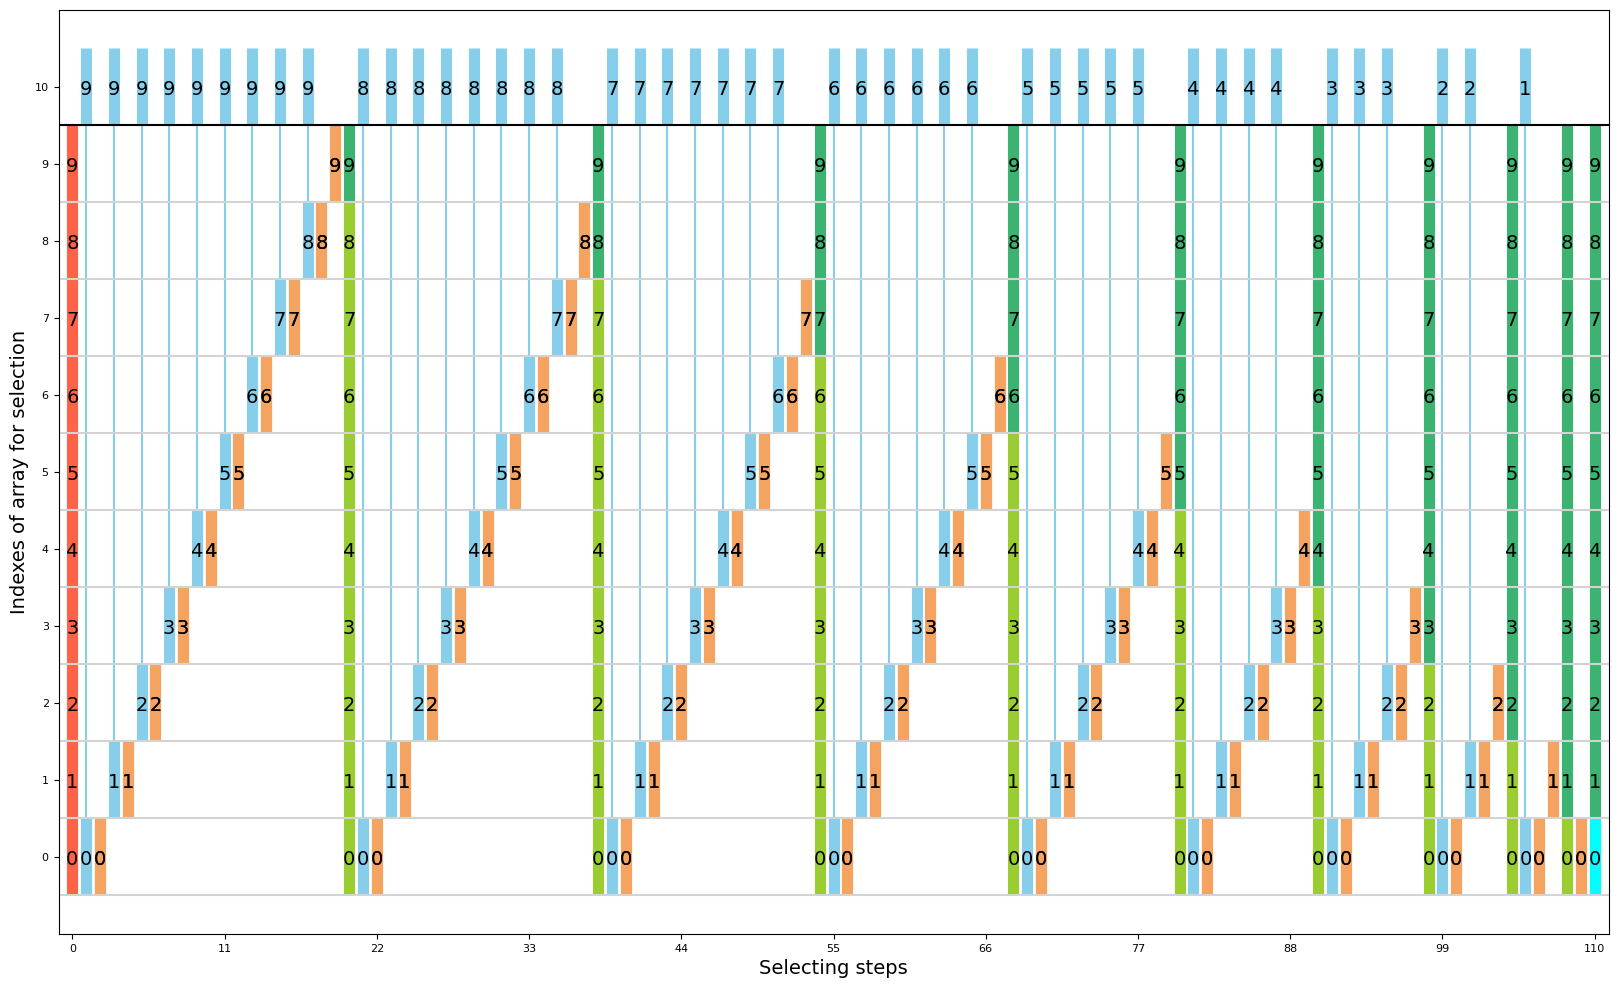

In [13]:
# test selecting smallest element from sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, sorted_array)
print(TEXT_FOUND, select(sorted_array, 0))
print(TEXT_AFTER_SELECTING, sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Found element: 0
After  selecting: [0, 8, 7, 6, 5, 4, 3, 2, 1, 9]


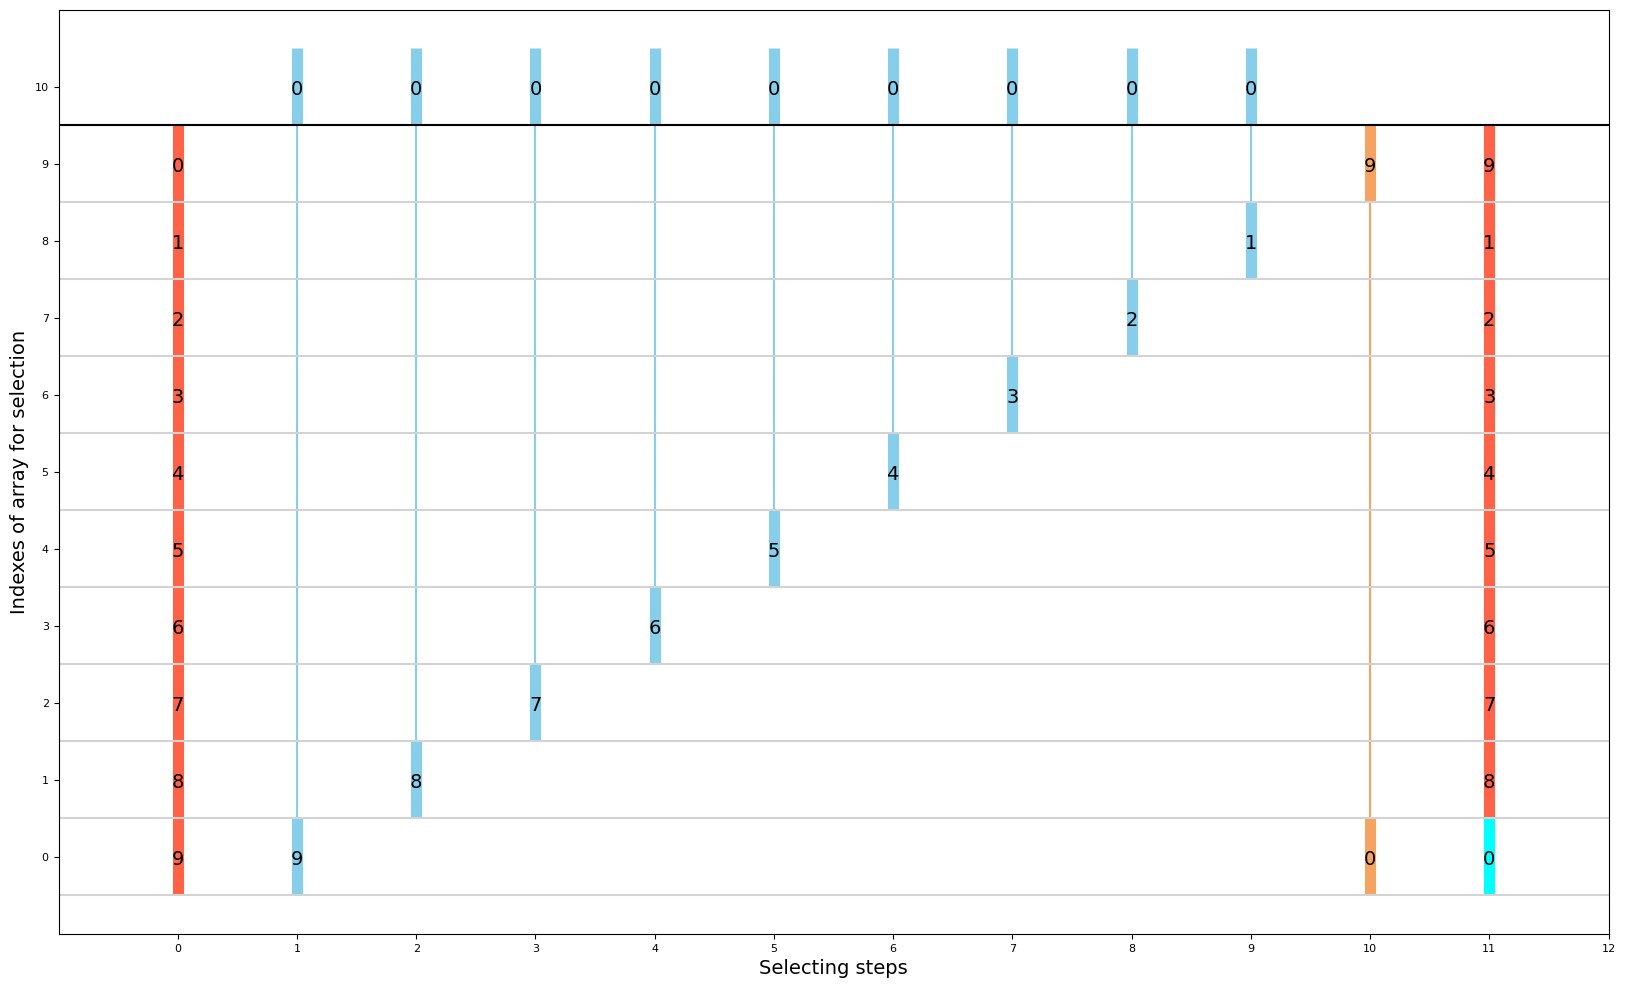

In [14]:
# test selecting smallest element from reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 0))
print(TEXT_AFTER_SELECTING, reverse_sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Found element: 5
After  selecting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


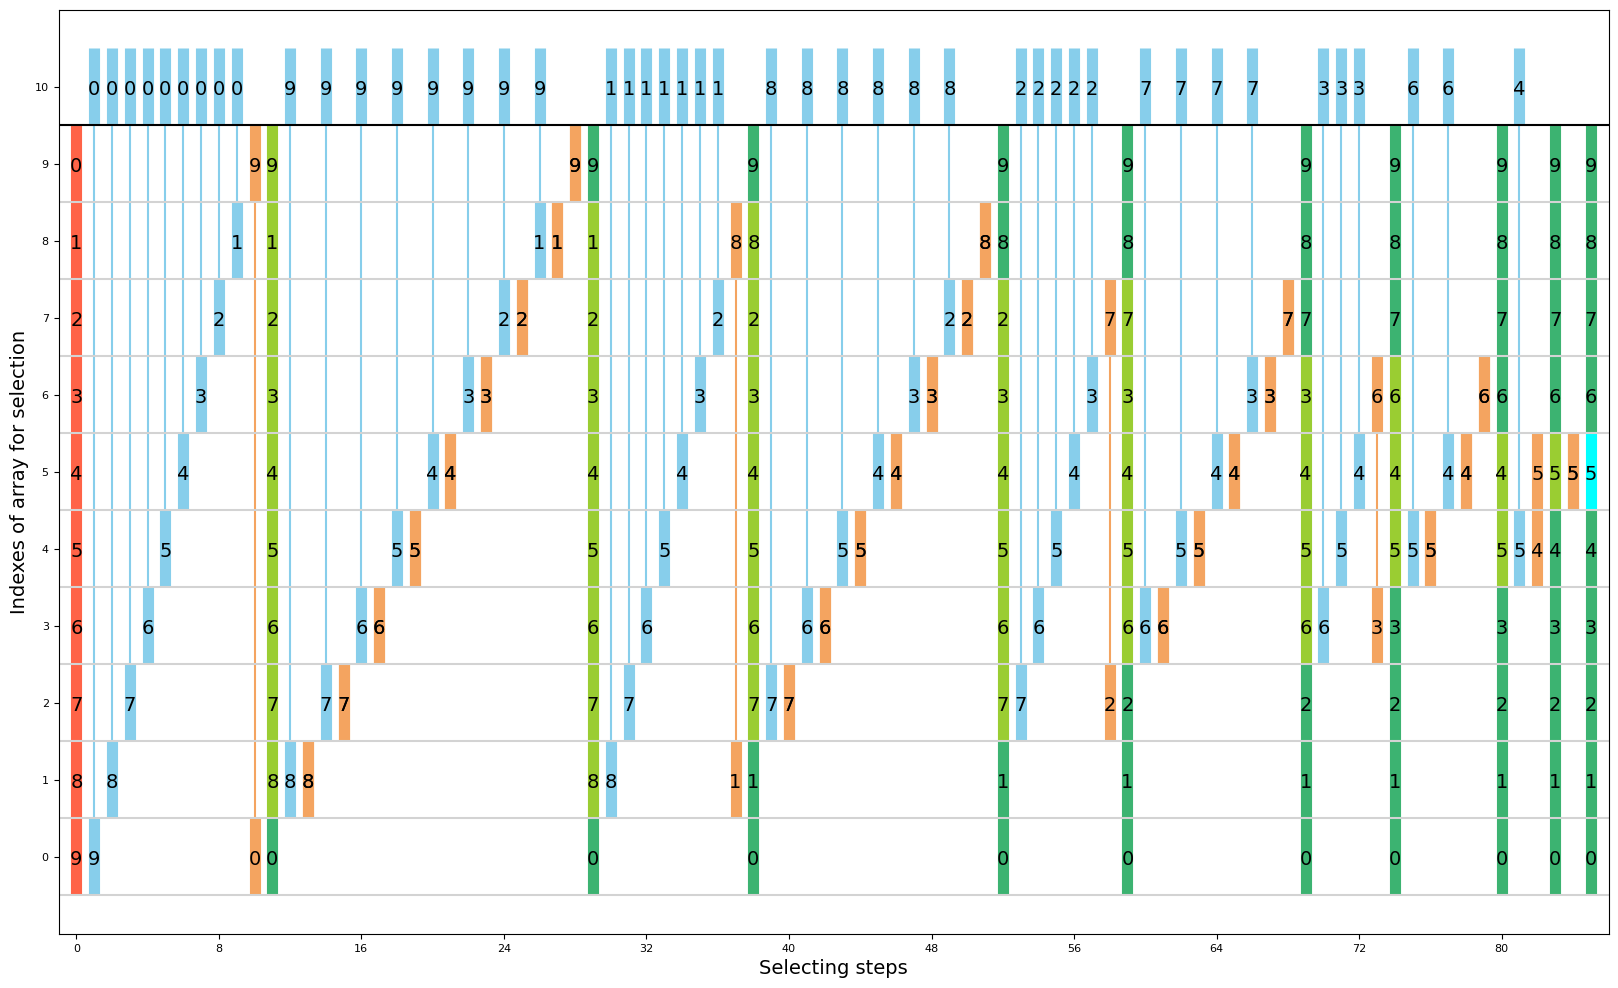

In [15]:
# test selecting element in the middle from reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 5))
print(TEXT_AFTER_SELECTING, reverse_sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Found element: 9
After  selecting: [0, 8, 7, 6, 5, 4, 3, 2, 1, 9]


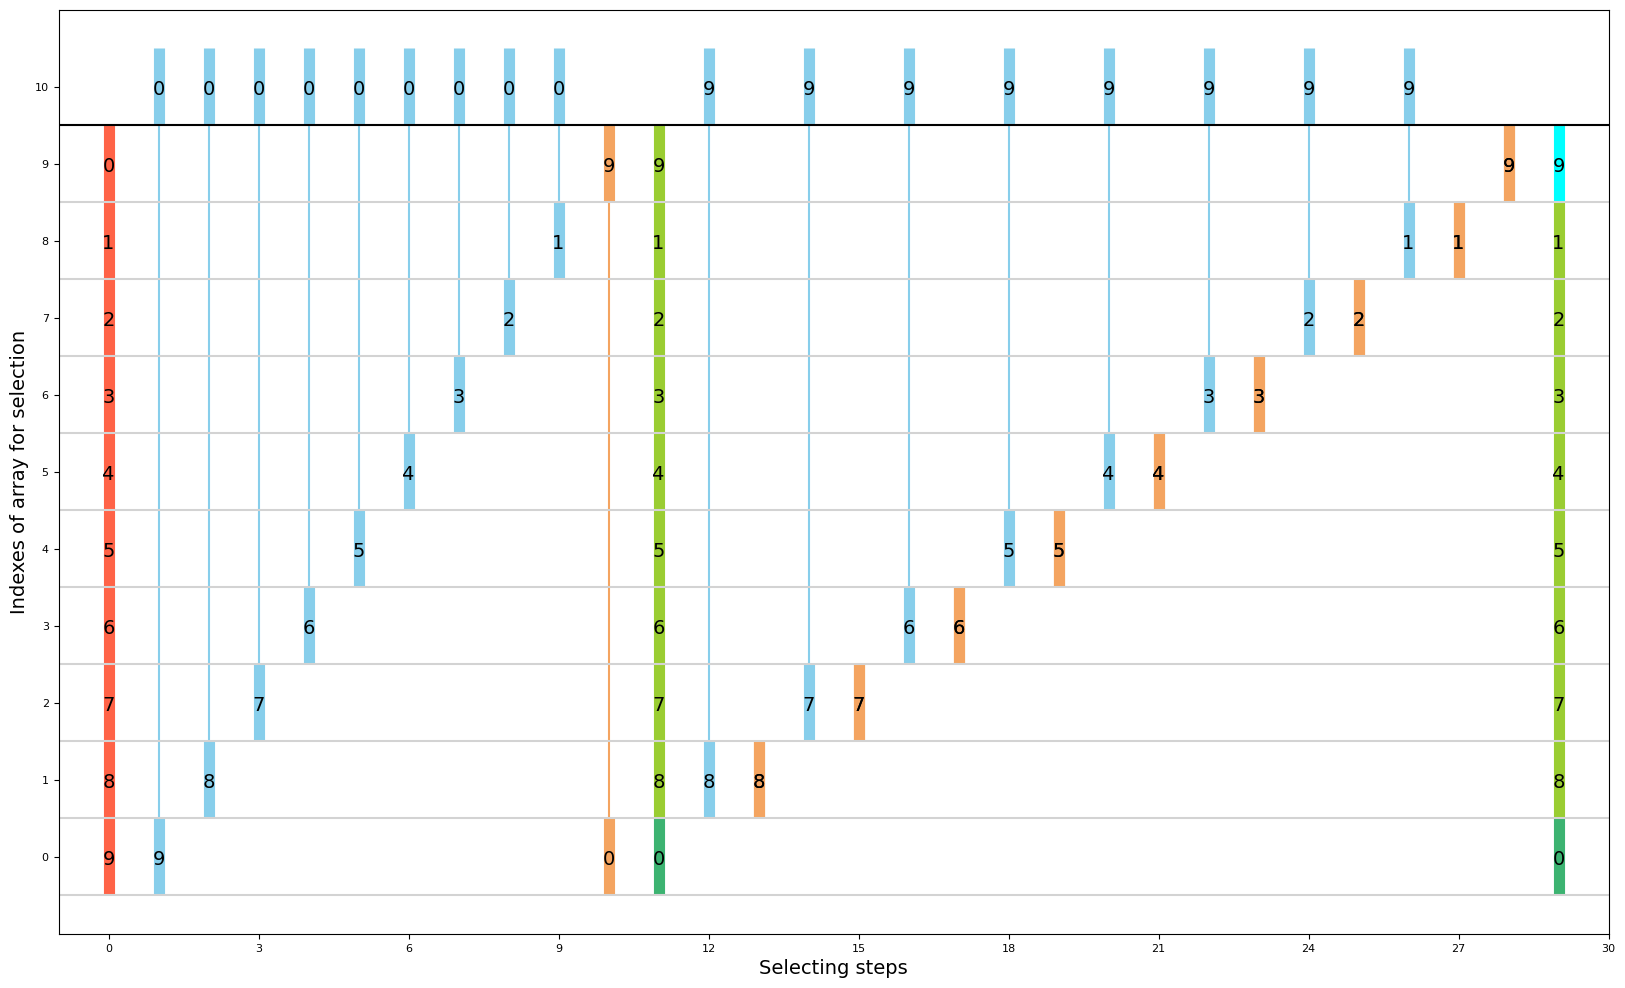

In [16]:
# test selecting largest element from reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SELECTING, reverse_sorted_array)
print(TEXT_FOUND, select(reverse_sorted_array, 9))
print(TEXT_AFTER_SELECTING, reverse_sorted_array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [np.int32(2), np.int32(8), np.int32(4), np.int32(9), np.int32(1), np.int32(6), np.int32(7), np.int32(3), np.int32(0), np.int32(5)]
Search for k-smallest element with k = 4
Found element: 4
After  selecting: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(7), np.int32(9), np.int32(8), np.int32(6)]


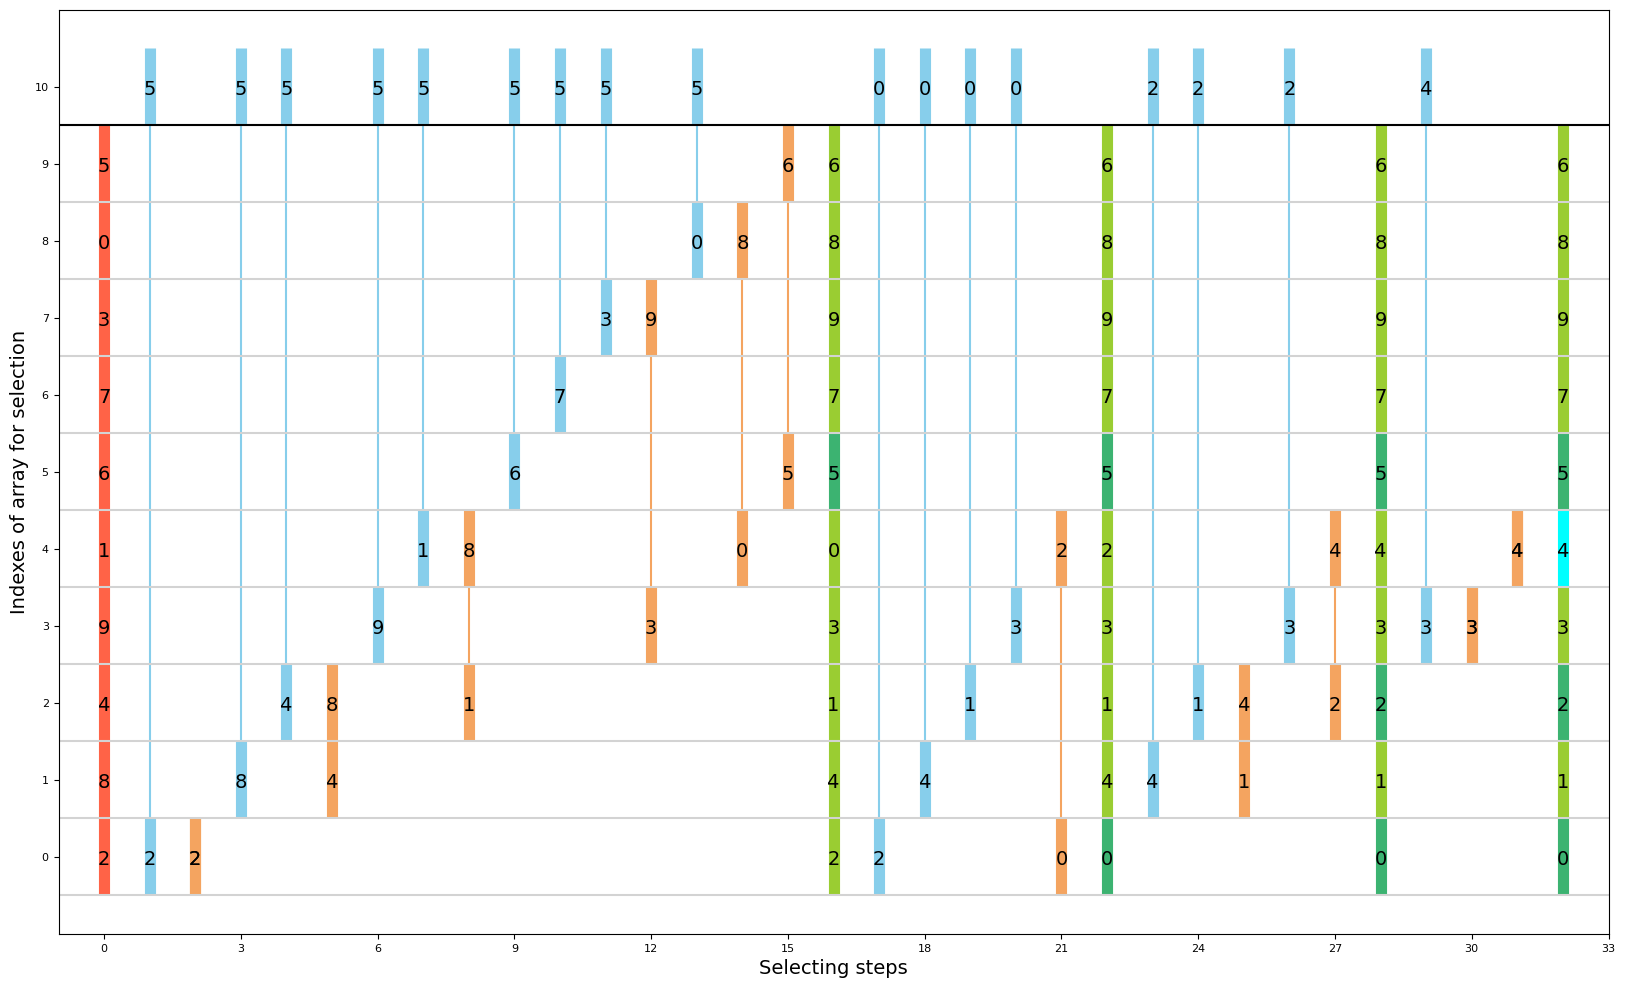

In [17]:
# test selecting in random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test selecting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SELECTING, array)
k = numpy.random.randint(ARRAY_SIZE)
print(TEXT_SEARCH, k)
print(TEXT_FOUND, select(array, k))
print(TEXT_AFTER_SELECTING, array)
output_graphical_view(ARRAY_SIZE)

### Your tests here ...

Before selecting: [2, 4, 0, 1, 3]
Found element: 1
After  selecting: [0, 1, 2, 3, 4]


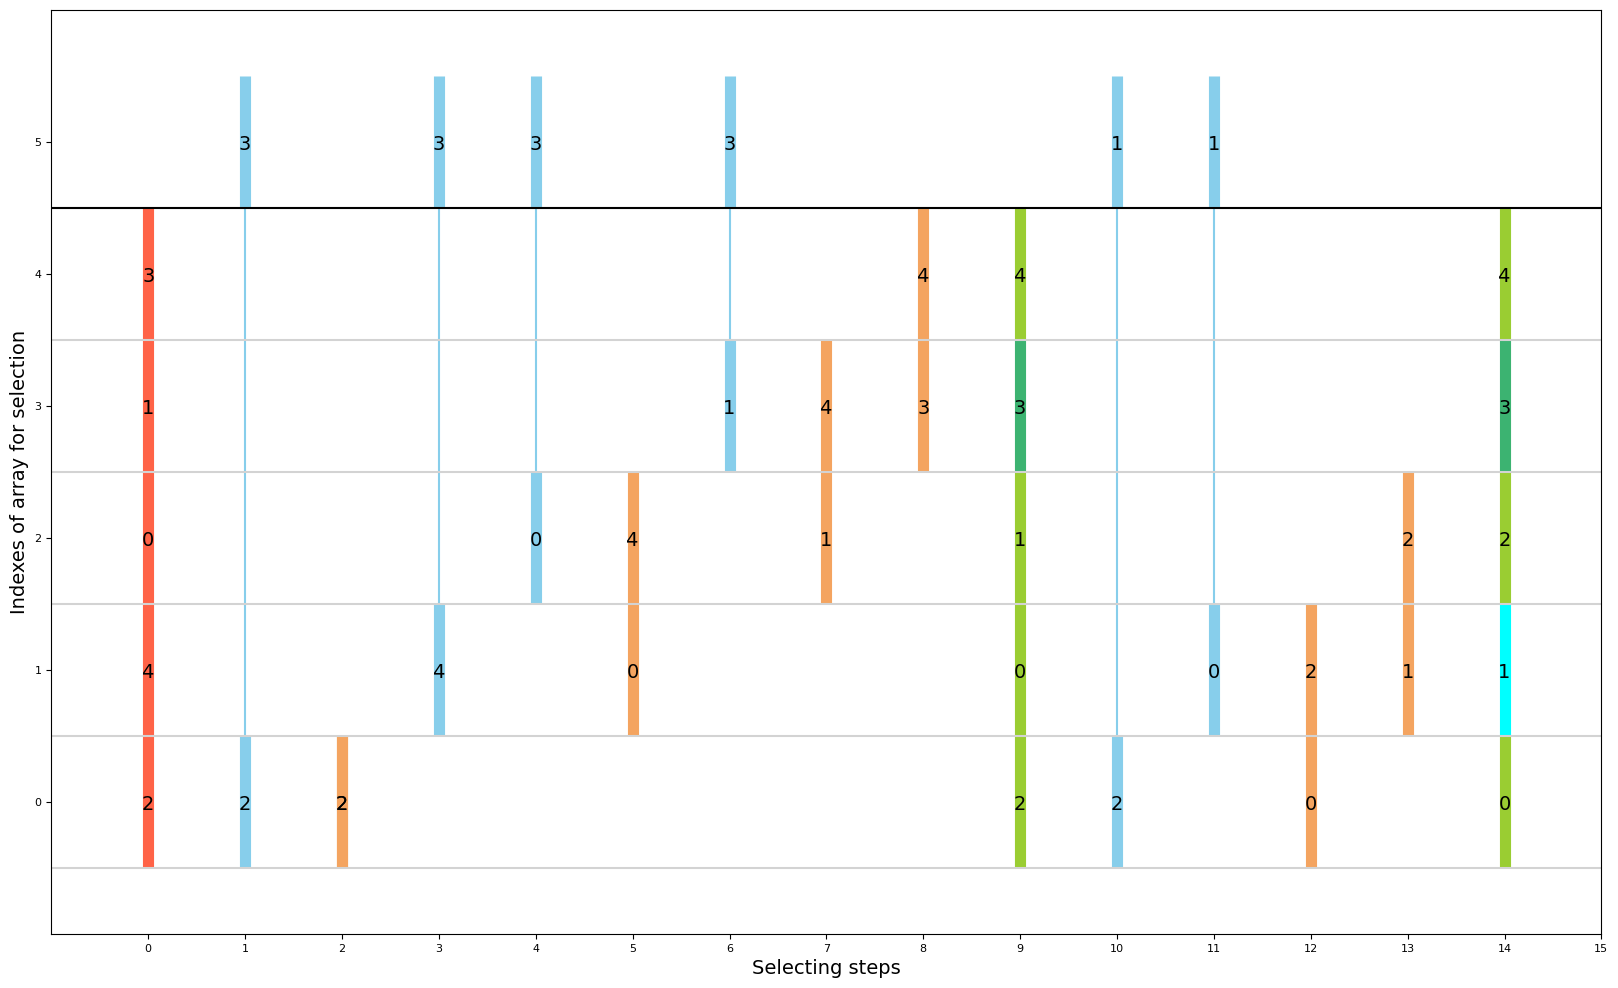

In [18]:
array = [2,4,0,1,3]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SELECTING, array)
print(TEXT_FOUND, select(array, 1))
print(TEXT_AFTER_SELECTING, array)
output_graphical_view(ARRAY_SIZE)

Before selecting: [4, 1, 3, 2, 0]
Found element: 1
After  selecting: [0, 1, 2, 3, 4]


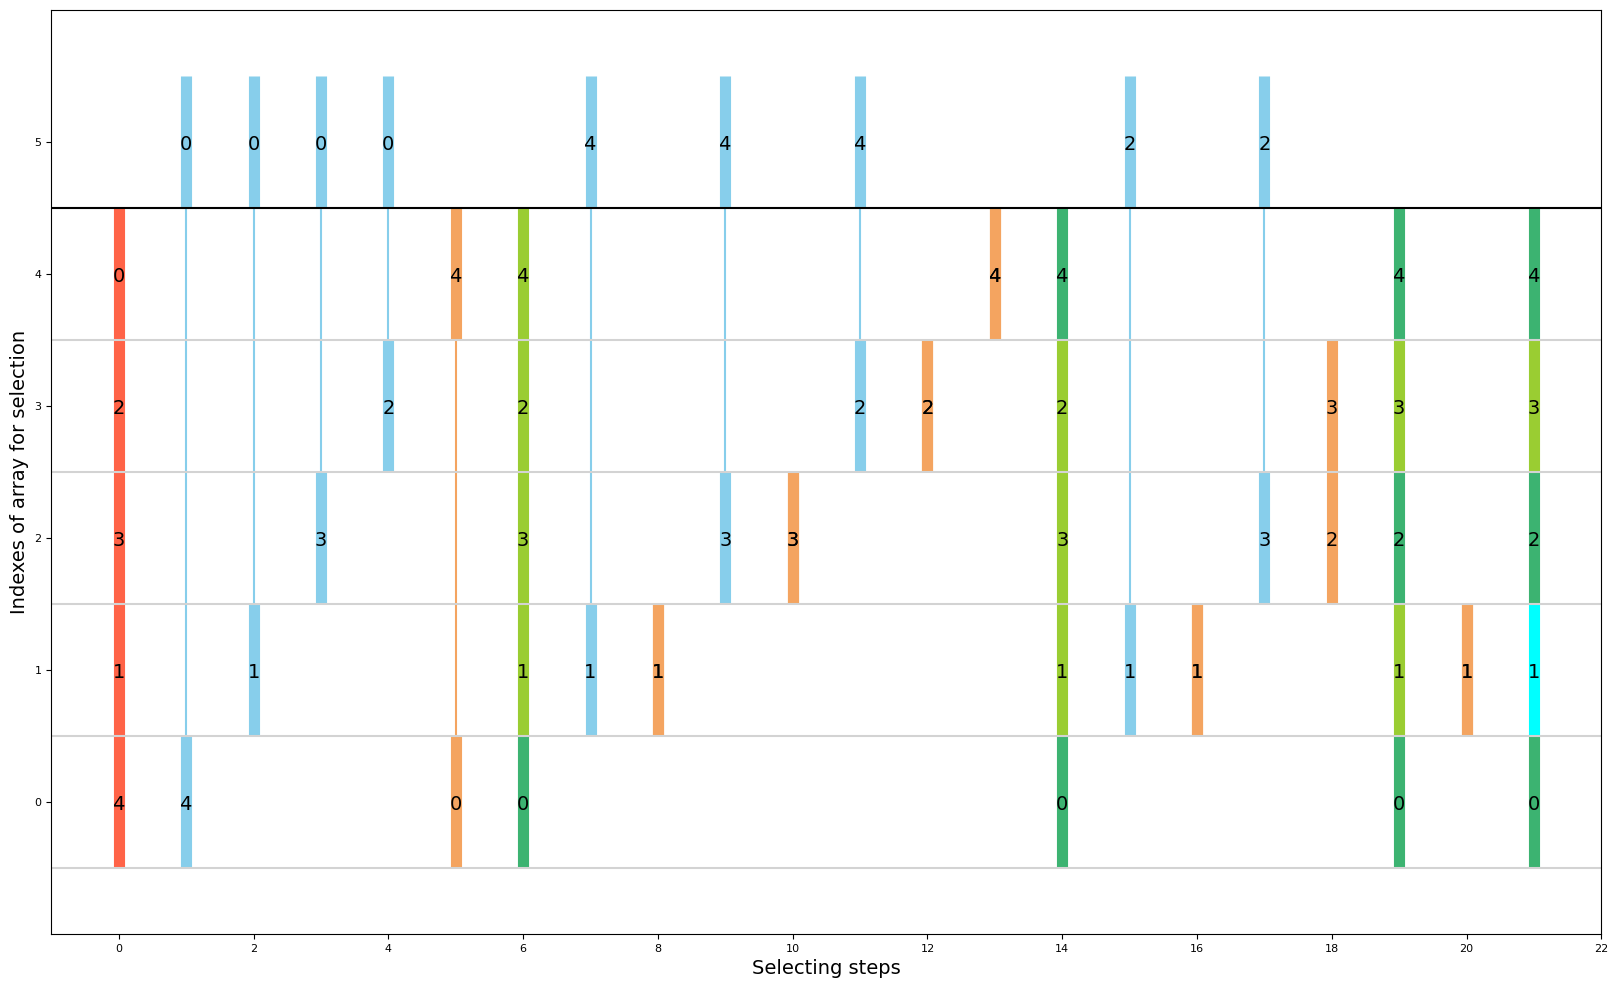

In [19]:
array = [4,1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SELECTING, array)
print(TEXT_FOUND, select(array, 1))
print(TEXT_AFTER_SELECTING, array)
output_graphical_view(ARRAY_SIZE)

In [20]:
# ... and here ...